In [ ]:
-main.py
| - /api
|   | - optimize.py
|   | - portfolio_history.py
|   | - combined_opt_hist.py
|   | - __init__.py
| - /core
|   | - history.py
|   | - optimizer.py
|   | - __init__.py
| - /utils
|   | - __init__.py
|   | - get_prices_sql.py
|   | - db.py
|   | - table_models.py

In [9]:
# Создание view
import sqlite3

def create_all_assets_view(db_path="moex_data.db"):
    query = """
    DROP VIEW IF EXISTS all_assets;
    CREATE VIEW all_assets AS
    SELECT tradedate, ticker, close, 'stock' AS asset_type FROM stock_values
    UNION ALL
    SELECT tradedate, secid AS ticker, close, 'index' AS asset_type FROM index_values
    UNION ALL
    SELECT tradedate, secid AS ticker, close, 'currency' AS asset_type FROM currency_values
    """
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    cursor.executescript(query)  # Use executescript to execute multiple statements
    conn.commit()
    conn.close()

create_all_assets_view()


In [58]:
import sqlite3
import pandas as pd

db_path = "moex_data.db"
query = "SELECT * FROM all_assets"

conn = sqlite3.connect(db_path)
df = pd.read_sql(query, conn)  # Use read_sql to directly fetch data into a DataFrame
conn.close()

print(df)  # Display the DataFrame

         tradedate      ticker      close asset_type
0       2015-07-01        CBOM     3.6800      stock
1       2015-07-02        CBOM     3.6455      stock
2       2015-07-03        CBOM     3.6370      stock
3       2015-07-06        CBOM     3.6700      stock
4       2015-07-07        CBOM     3.6310      stock
...            ...         ...        ...        ...
697122  2025-04-07  GLDRUB_TOM  8311.3000   currency
697123  2025-04-08  GLDRUB_TOM  8360.0000   currency
697124  2025-04-09  GLDRUB_TOM  8514.9000   currency
697125  2025-04-10  GLDRUB_TOM  8577.0000   currency
697126  2025-04-11  GLDRUB_TOM  8589.0000   currency

[697127 rows x 4 columns]


In [6]:
# Все таблицы
import sqlite3

def view_all_tables_and_views(db_path="moex_data.db"):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Fetching all tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    # Fetching all views
    cursor.execute("SELECT name FROM sqlite_master WHERE type='view';")
    views = cursor.fetchall()

    conn.close()

    return {
        "tables": [table[0] for table in tables],
        "views": [view[0] for view in views]
    }

# Call the function and print the results
result = view_all_tables_and_views()
print("Tables:", result["tables"])
print("Views:", result["views"])

Tables: ['index_list', 'currency_values', 'index_values', 'stock_values', 'indices', 'asset_classes']
Views: ['all_assets']


In [2]:
from utils.get_prices_sql import get_prices_orm

tickers = ['SBER', 'IMOEX', 'RGBITR', 'LKOH']
start_date = "1995-01-01"
end_date = None
frequency = 252

# Получаем данные из базы
df = get_prices_orm(tickers, start_date=start_date, end_date=end_date, frequency=frequency)
df

ticker,IMOEX,LKOH,RGBITR,SBER
tradedate,,,,
1997-09-22,100.00,NaN,NaN,NaN
1997-09-23,100.67,NaN,NaN,NaN
1997-09-24,99.94,NaN,NaN,NaN
1997-09-25,99.46,NaN,NaN,NaN
1997-09-26,98.87,NaN,NaN,NaN
...,...,...,...,...
2025-04-07,2729.89,6349.5,616.88,287.56
2025-04-08,2746.41,6283.5,622.78,282.03
2025-04-09,2650.69,6507.0,616.65,293.40


In [12]:
from utils.get_prices_sql import get_prices_orm

#tickers = ['IMOEX', 'RGBI']
tickers = ['Золото', 'Рынок акций']
mode = 'assets'
get_prices_orm(tickers, mode = mode)

ticker,GLDRUB_TOM,MCFTR
tradedate,,
2003-02-26,NaN,335.67
2003-02-27,NaN,338.35
2003-02-28,NaN,341.52
2003-03-03,NaN,352.24
2003-03-04,NaN,348.40
...,...,...
2025-04-07,8311.3,6765.86
2025-04-08,8360.0,6806.80
2025-04-09,8514.9,6569.56


In [10]:
import sqlite3
import pandas as pd
# Подключаемся к базе данных
DB_NAME = "moex_data.db"
conn = sqlite3.connect(DB_NAME)

# Читаем данные по тикерам из таблицы index_values
query = "SELECT * FROM asset_classes"
df = pd.read_sql(query, conn)

# Закрываем соединение
conn.close()

df

,ticker,asset_ru,asset_en,name_ru
0,MCFTR,Рынок акций,Stock market,Индекс МосБиржи полной доходности
1,MEBCTR,Крупные компании (голубые фишки),Large companies (blue chips),Индекс МосБиржи голубых фишек
2,MESMTR,Акции компаний средней и малой капитализации,Shares of mid-cap and small-cap companies,Индекс МосБиржи средней и малой капитализации
3,RGBITR,Государственные облигации,Government bonds,Индекс Мосбиржи государственных облигаций
4,RUCBITRL1,Коропоративные облигации,Corporate bonds,Индекс корпоративных облигаций Котировальный л...
5,RUEYBCSTR,Облигации повышенной доходности,High-yield bonds,Индекс МосБиржи Облигаций повышенной доходност...
6,RUCBHYTR,Высокодоходные облигации (ВДО) - повышенный риск,High-yield bonds (HYB) - increased risk,Индекс МосБиржи Высокодоходных Облигаций Повыш...
7,RURPLRUBTR,Замещающие облигации,Substitute bonds,Индекс МосБиржи Замещающих Облигаций
8,GLDRUB_TOM,Золото,Gold,Золото
9,MREFTR,Недвижимость,Real estate,Индекс МосБиржи фондов недвижимости полной дох...


In [9]:
import sqlite3

conn = sqlite3.connect("moex_data.db")
cursor = conn.cursor()

cursor.executescript("""
CREATE TABLE asset_classes_new (
    ticker TEXT PRIMARY KEY,
    asset_ru TEXT,
    asset_en TEXT,
    name_ru TEXT
);

INSERT INTO asset_classes_new (ticker, asset_ru, asset_en, name_ru)
SELECT ticker, asset_ru, asset_en, name_ru FROM asset_classes;

DROP TABLE asset_classes;

ALTER TABLE asset_classes_new RENAME TO asset_classes;
""")

conn.commit()
conn.close()


In [9]:
import sqlite3
import pandas as pd

def get_unique_secid(db_path="moex_data.db"):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Fetching unique secid values from index_values table
    cursor.execute("SELECT * FROM asset_classes;")
    unique_secid = cursor.fetchall()

    conn.close()

    return unique_secid

# Call the function and print the results
unique_secid_values = pd.DataFrame(get_unique_secid())
unique_secid_values


,0,1,2,3
0,MCFTR,Рынок акций,Stock market,Индекс МосБиржи полной доходности
1,MEBCTR,Крупные компании (голубые фишки),Large companies (blue chips),Индекс МосБиржи голубых фишек
2,MESMTR,Акции компаний средней и малой капитализации,Shares of mid-cap and small-cap companies,Индекс МосБиржи средней и малой капитализации
3,RGBITR,Государственные облигации,Government bonds,Индекс Мосбиржи государственных облигаций
4,RUCBITRL1,Коропоративные облигации,Corporate bonds,Индекс корпоративных облигаций Котировальный л...
5,RUEYBCSTR,Облигации повышенной доходности,High-yield bonds,Индекс МосБиржи Облигаций повышенной доходност...
6,RUCBHYTR,Высокодоходные облигации (ВДО) - повышенный риск,High-yield bonds (HYB) - increased risk,Индекс МосБиржи Высокодоходных Облигаций Повыш...
7,RURPLRUBTR,Замещающие облигации,Substitute bonds,Индекс МосБиржи Замещающих Облигаций
8,GLDRUB_TOM,Золото,Gold,Золото
9,MREFTR,Недвижимость,Real estate,Индекс МосБиржи фондов недвижимости полной дох...


In [ ]:
from utils.get_prices_sql import get_index_values_sql
tickers = ['RUCBTRNS', 'RUCBITR']
#tickers = ['RUCBTRNS', 'RUCBITR']
df = get_index_values_sql(tickers=tickers)
df = df.dropna()  # Keep only rows where there are no NaN values
cumulative_returns = (1 + df.pct_change()).cumprod() - 1
cumulative_returns.dropna(inplace=True)
cumulative_returns

secid,RUCBITR,RUCBTRNS
tradedate,,
2020-04-02,0.001807,0.001378
2020-04-03,0.003281,0.002326
2020-04-06,0.006443,0.005083
2020-04-07,0.008155,0.007926
2020-04-08,0.009273,0.010855
...,...,...
2023-05-25,0.216083,0.254824
2023-05-26,0.217414,0.256203
2023-05-29,0.218104,0.256978


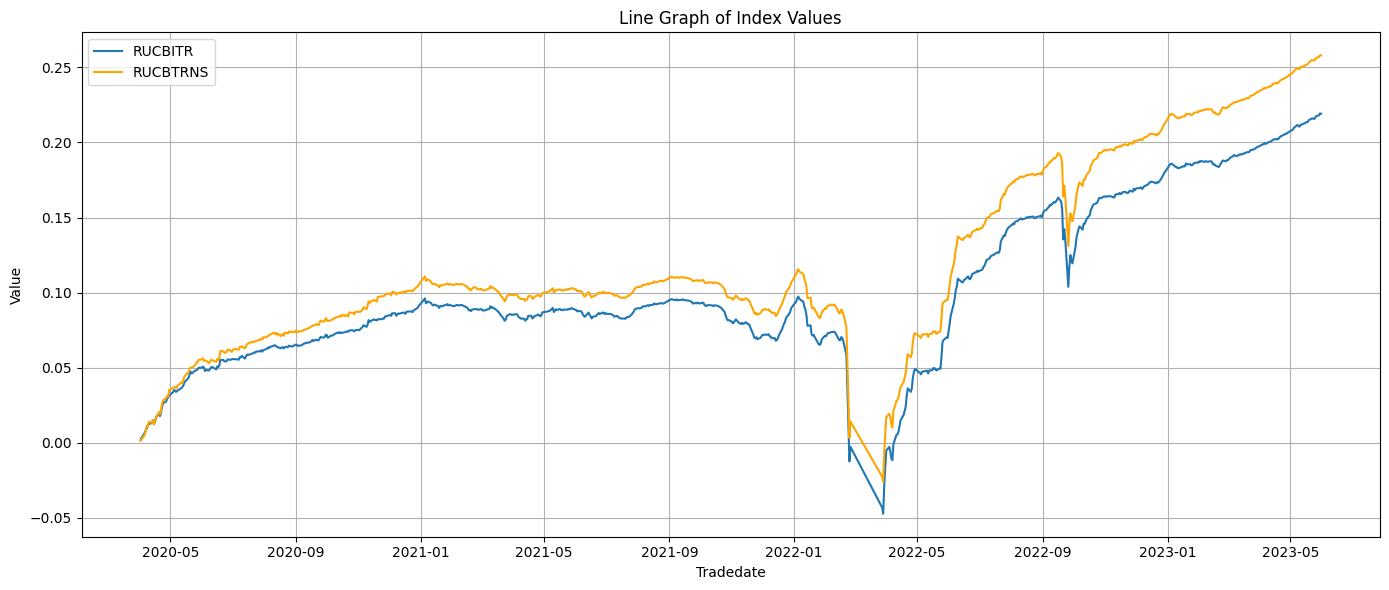

In [17]:
import matplotlib.pyplot as plt

# Plotting both lines on a single graph
plt.figure(figsize=(14, 6))
plt.plot(cumulative_returns.index, cumulative_returns[cumulative_returns.columns[0]], label=cumulative_returns.columns[0])
plt.plot(cumulative_returns.index, cumulative_returns[cumulative_returns.columns[1]], label=cumulative_returns.columns[1], color='orange')
plt.title('Line Graph of Index Values')
plt.xlabel('Tradedate')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [56]:
from utils.get_prices_sql import get_index_values_sql
from pypfopt import expected_returns, risk_models, EfficientFrontier, objective_functions

tickers = ['MCFTR', 'MESMTR', 'MEBCTR']
#tickers = ['RUCBTRNS', 'RUCBITR']
frequency =252
df = get_index_values_sql(tickers=tickers, start_date='2015-01-01', end_date='2025-04-14', frequency=frequency)
df = df.dropna()  # Keep only rows where there are no NaN values


mu = expected_returns.mean_historical_return(df, frequency=frequency)
S = risk_models.sample_cov(df, frequency=frequency)
print(mu)
print(S)

secid
MCFTR     0.140093
MEBCTR    0.140353
MESMTR    0.099656
dtype: float64
secid      MCFTR    MEBCTR    MESMTR
secid                               
MCFTR   0.055808  0.058390  0.042560
MEBCTR  0.058390  0.061532  0.043048
MESMTR  0.042560  0.043048  0.043826


In [1]:
import pandas as pd
from sqlalchemy.orm import Session
from utils.db import SessionLocal
from utils.table_models import AssetClass

def init_asset_classes_from_file(filepath: str):
    df = pd.read_excel(filepath)  # Или pd.read_csv(filepath)

    session: Session = SessionLocal()

    try:
        for _, row in df.iterrows():
            # Проверка на дубликаты по ticker
            existing = session.query(AssetClass).filter_by(ticker=row['ticker']).first()
            if not existing:
                asset = AssetClass(
                    asset_ru=row['asset_ru'],
                    asset_en=row['asset_en'],
                    name_ru=row['name_ru'],
                    ticker=row['ticker']
                )
                session.add(asset)

        session.commit()
        print("AssetClass таблица успешно заполнена.")
    except Exception as e:
        session.rollback()
        print("Ошибка при добавлении классов активов:", e)
    finally:
        session.close()


In [5]:
init_asset_classes_from_file(r"C:\Users\sofya\Desktop\asset_ticker.xlsx")

AssetClass таблица успешно заполнена.


In [4]:
# init_db.py
from utils.db import engine
from utils.table_models import Base

def init_db():
    Base.metadata.create_all(bind=engine)
    print("Все таблицы успешно созданы.")

if __name__ == "__main__":
    init_db()


Все таблицы успешно созданы.


In [8]:
import pandas as pd

df = pd.read_excel(r'C:\Users\sofya\Desktop\asset_ticker.xlsx', engine="openpyxl")
df

,asset_ru,asset_en,name_ru,ticker
0,Рынок акций,Stock market,Индекс МосБиржи полной доходности,MCFTR
1,Крупные компании (голубые фишки),Large companies (blue chips),Индекс МосБиржи голубых фишек,MEBCTR
2,Акции компаний средней и малой капитализации,Shares of mid-cap and small-cap companies,Индекс МосБиржи средней и малой капитализации,MESMTR
3,Государственные облигации,Government bonds,Индекс Мосбиржи государственных облигаций,RGBITR
4,Коропоративные облигации,Corporate bonds,Индекс корпоративных облигаций Котировальный л...,RUCBITRL1
5,Облигации повышенной доходности,High-yield bonds,Индекс МосБиржи Облигаций повышенной доходност...,RUEYBCSTR
6,Высокодоходные облигации (ВДО) - повышенный риск,High-yield bonds (HYB) - increased risk,Индекс МосБиржи Высокодоходных Облигаций Повыш...,RUCBHYTR
7,Замещающие облигации,Substitute bonds,Индекс МосБиржи Замещающих Облигаций,RURPLRUBTR
8,Золото,Gold,Золото,GLDRUB_TOM
9,Недвижимость,Real estate,Индекс МосБиржи фондов недвижимости полной дох...,MREFTR


In [10]:
from utils.get_prices_sql import get_prices_orm

tickers = ['GLDRUB_TOM', 'LKOH']
get_prices_orm(tickers, frequency=12, mode='tickers')



ticker,GLDRUB_TOM,LKOH
tradedate,,
2003-08-31,NaN,595.99
2003-09-30,NaN,625.90
2003-10-31,NaN,609.50
2003-11-30,NaN,642.32
2003-12-31,NaN,677.00
...,...,...
2024-12-31,8550.0,7235.00
2025-01-31,8840.0,7171.00
2025-02-28,8168.5,7546.50


In [4]:
from core.optimizer import optimizer_for_portfolio
from core.history import get_portfolio_history, calculate_max_drawdown_and_recovery
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

tickers = ['MCFTR', 'GLDRUB_TOM']
frequency=252
start_date='2015-01-01'
end_date='2025-04-14'
mode = 'tickers'

weights = optimizer_for_portfolio(tickers, rf=0.02, frequency=frequency, mode=mode)
print(weights['weights_dict'])
df_history, message = get_portfolio_history(
    weights['weights_dict'], start_date=start_date, end_date=end_date,
    frequency=252, mode=mode
    )

df_history
#calculate_max_drawdown_and_recovery(port_hist[0])

Expected annual return: 17.7%
Annual volatility: 17.7%
Sharpe Ratio: 0.89
{'GLDRUB_TOM': 0.6076, 'MCFTR': 0.3924}


,tradedate,portfolio_value
0,2015-01-06,1.012203e+06
1,2015-01-08,1.029845e+06
2,2015-01-09,1.021465e+06
3,2015-01-12,1.020894e+06
4,2015-01-13,1.059143e+06
5,2015-01-14,1.072699e+06
6,2015-01-15,1.066566e+06
7,2015-01-16,1.090583e+06
8,2015-01-19,1.079383e+06
9,2015-01-20,1.091015e+06


In [3]:
from utils.get_prices_sql import get_prices_orm

item_list = ['GLDRUB_TOM']

price_pivot = get_prices_orm(item_list)
#print(price_pivot)

# Calculating returns
price_pivot = price_pivot.replace(0, method='ffill')
price_pivot = price_pivot.replace(0, method='bfill') #!!!!
price_pivot = price_pivot.dropna(how='any')


C:\Users\sofya\AppData\Local\Temp\ipykernel_8324\1531417559.py:9: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  price_pivot = price_pivot.replace(0, method='ffill')
C:\Users\sofya\AppData\Local\Temp\ipykernel_8324\1531417559.py:10: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  price_pivot = price_pivot.replace(0, method='bfill') #!!!!


In [5]:
price_pivot.describe()

ticker,GLDRUB_TOM
count,2898.000000
mean,3644.740663
std,1784.479465
min,1256.000000
25%,2416.975000
50%,2977.200000
75%,4435.250000
max,9036.800000
